In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

In [2]:
oog = OG.BasicOpticalGating.default()

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif
Getting SADs
Getting phases


In [3]:
data = tf.imread(r"D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif")

In [4]:
order = np.argsort(oog.phases)

In [5]:
print(order.shape)

(1106,)


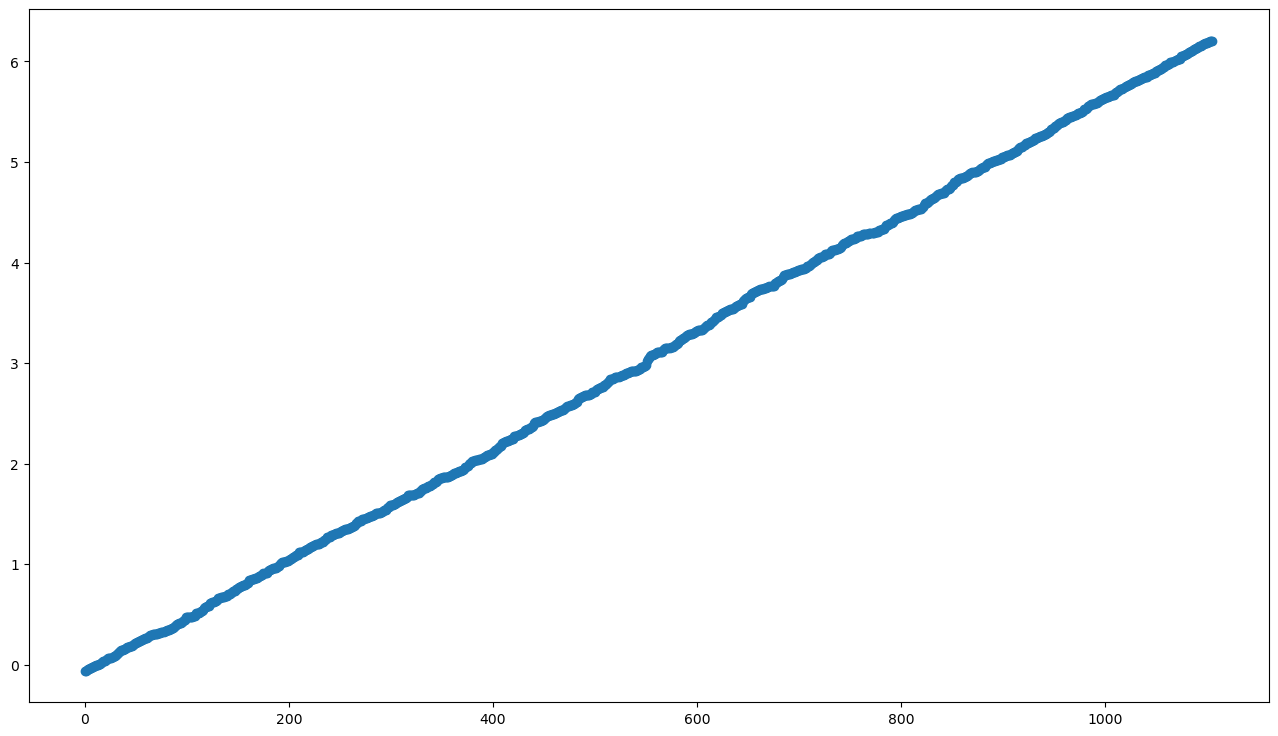

In [6]:
plt.figure(figsize = (16,9))
plt.scatter(range(len(oog.phases)), oog.phases[order])
plt.show()

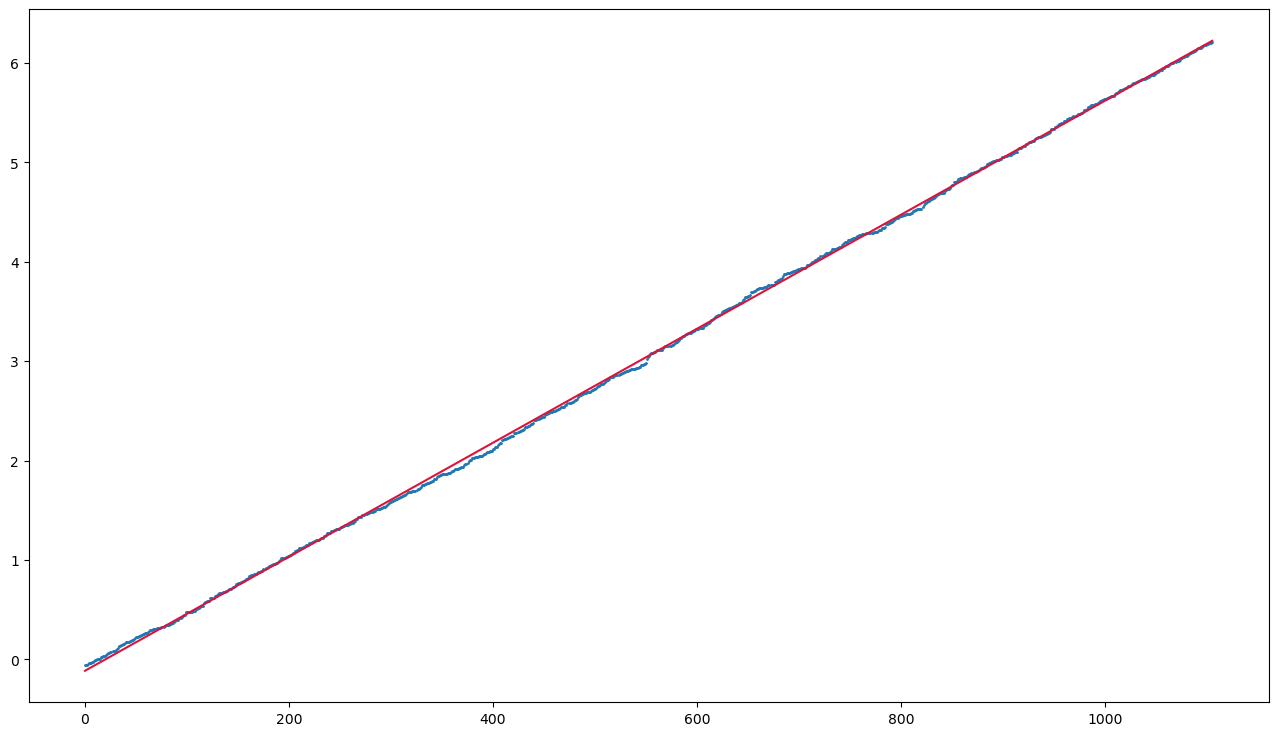

In [7]:
from scipy.optimize import curve_fit

def fit_func(x, m, c):
    return m*x + c

popt, pcov = curve_fit(fit_func, range(len(oog.phases)), oog.phases[order])

plt.figure(figsize = (16,9))
plt.scatter(range(len(oog.phases)), oog.phases[order], s = 1)
plt.plot(range(len(oog.phases)), fit_func(range(len(oog.phases)), *popt), c = "crimson")
plt.show()

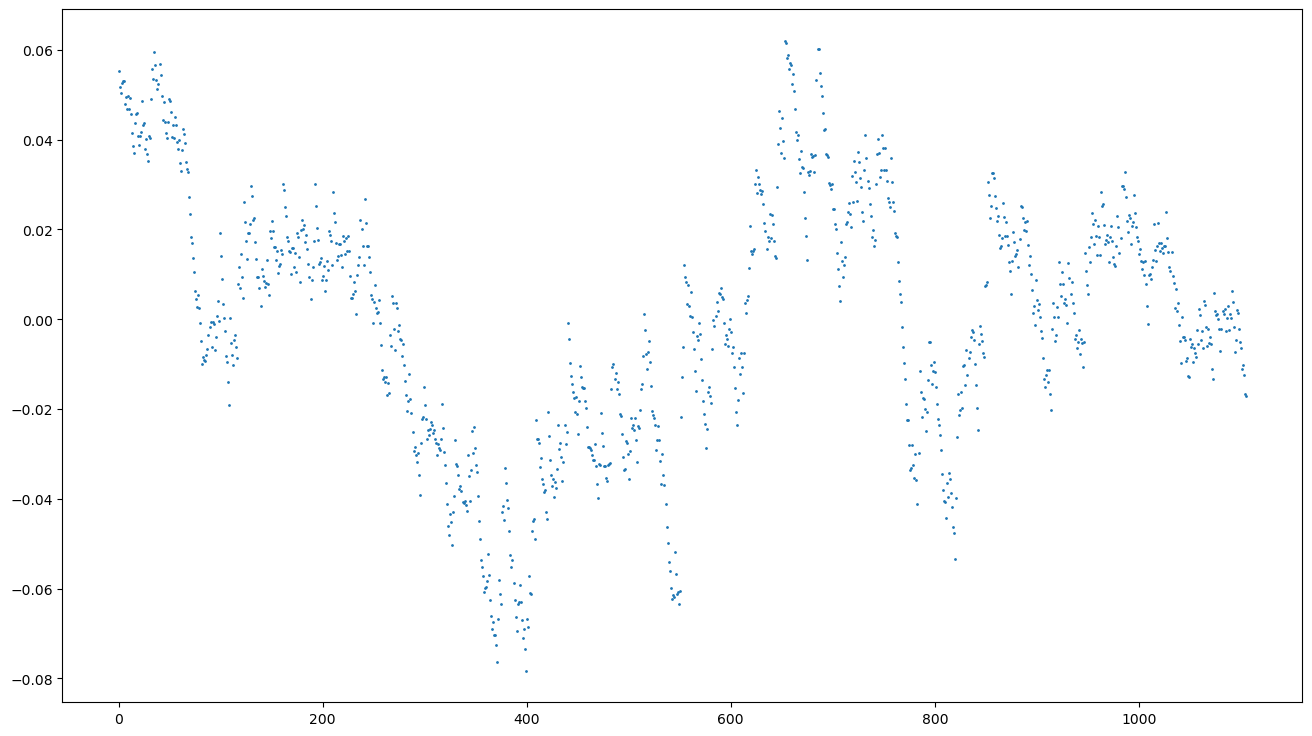

In [8]:
#plot fit residuals

plt.figure(figsize = (16,9))
plt.scatter(range(len(oog.phases)), oog.phases[order] - fit_func(range(len(oog.phases)), *popt), s = 1)
plt.show()

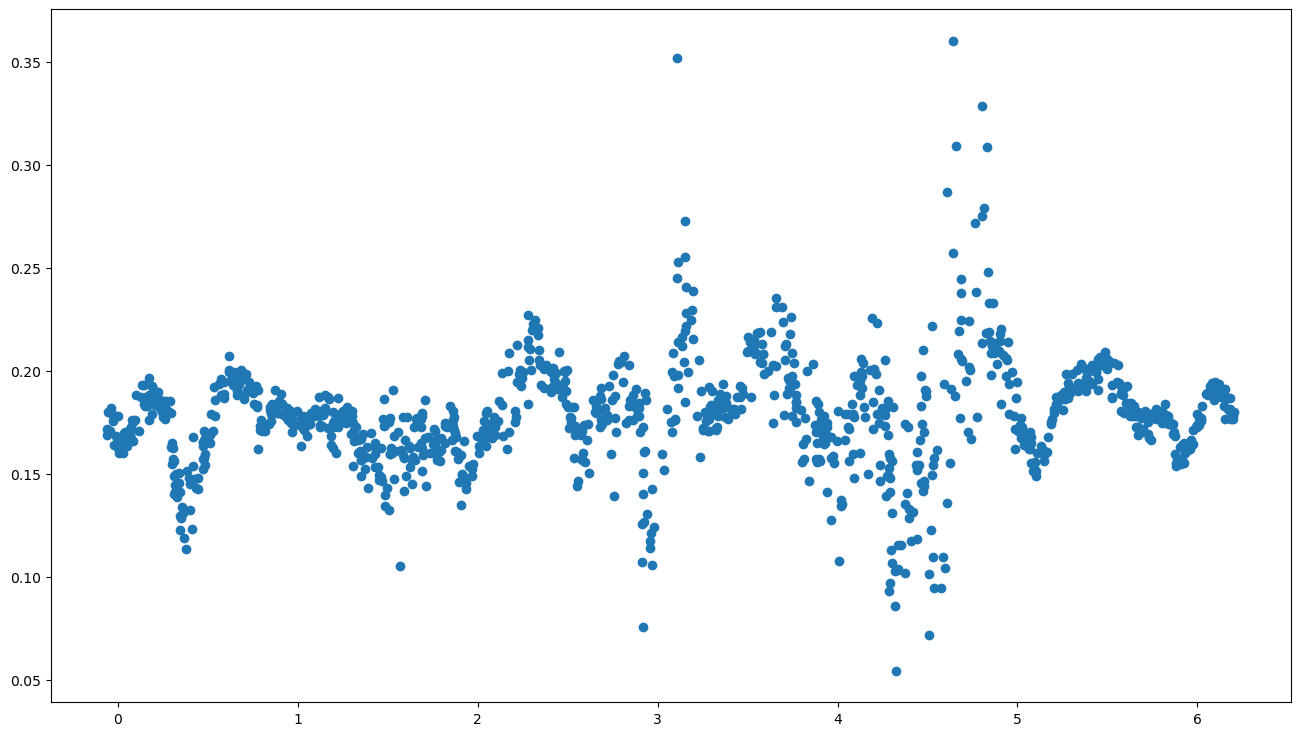

In [9]:
plt.figure(figsize = (16,9))
plt.scatter(oog.phases[1::], oog.delta_phases)
plt.show()